### Import Requirements

In [209]:
 %matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np

# Waveform Function

In [2]:
def waveforms(starttime, adj_endtime):
    start_t = UTCDateTime(starttime)
    end_t = start_t + adj_endtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

# Waveform Filter Function

In [3]:
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text

# Wavefrom Plotter Function

In [273]:
def waveform_plotter(date, filtered, event, ax, channels = [0]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[0]), fill_value=100) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)
    
#no longer an editable function BUT zooming on a single plot will not effect all plots

# Example

<IPython.core.display.Javascript object>


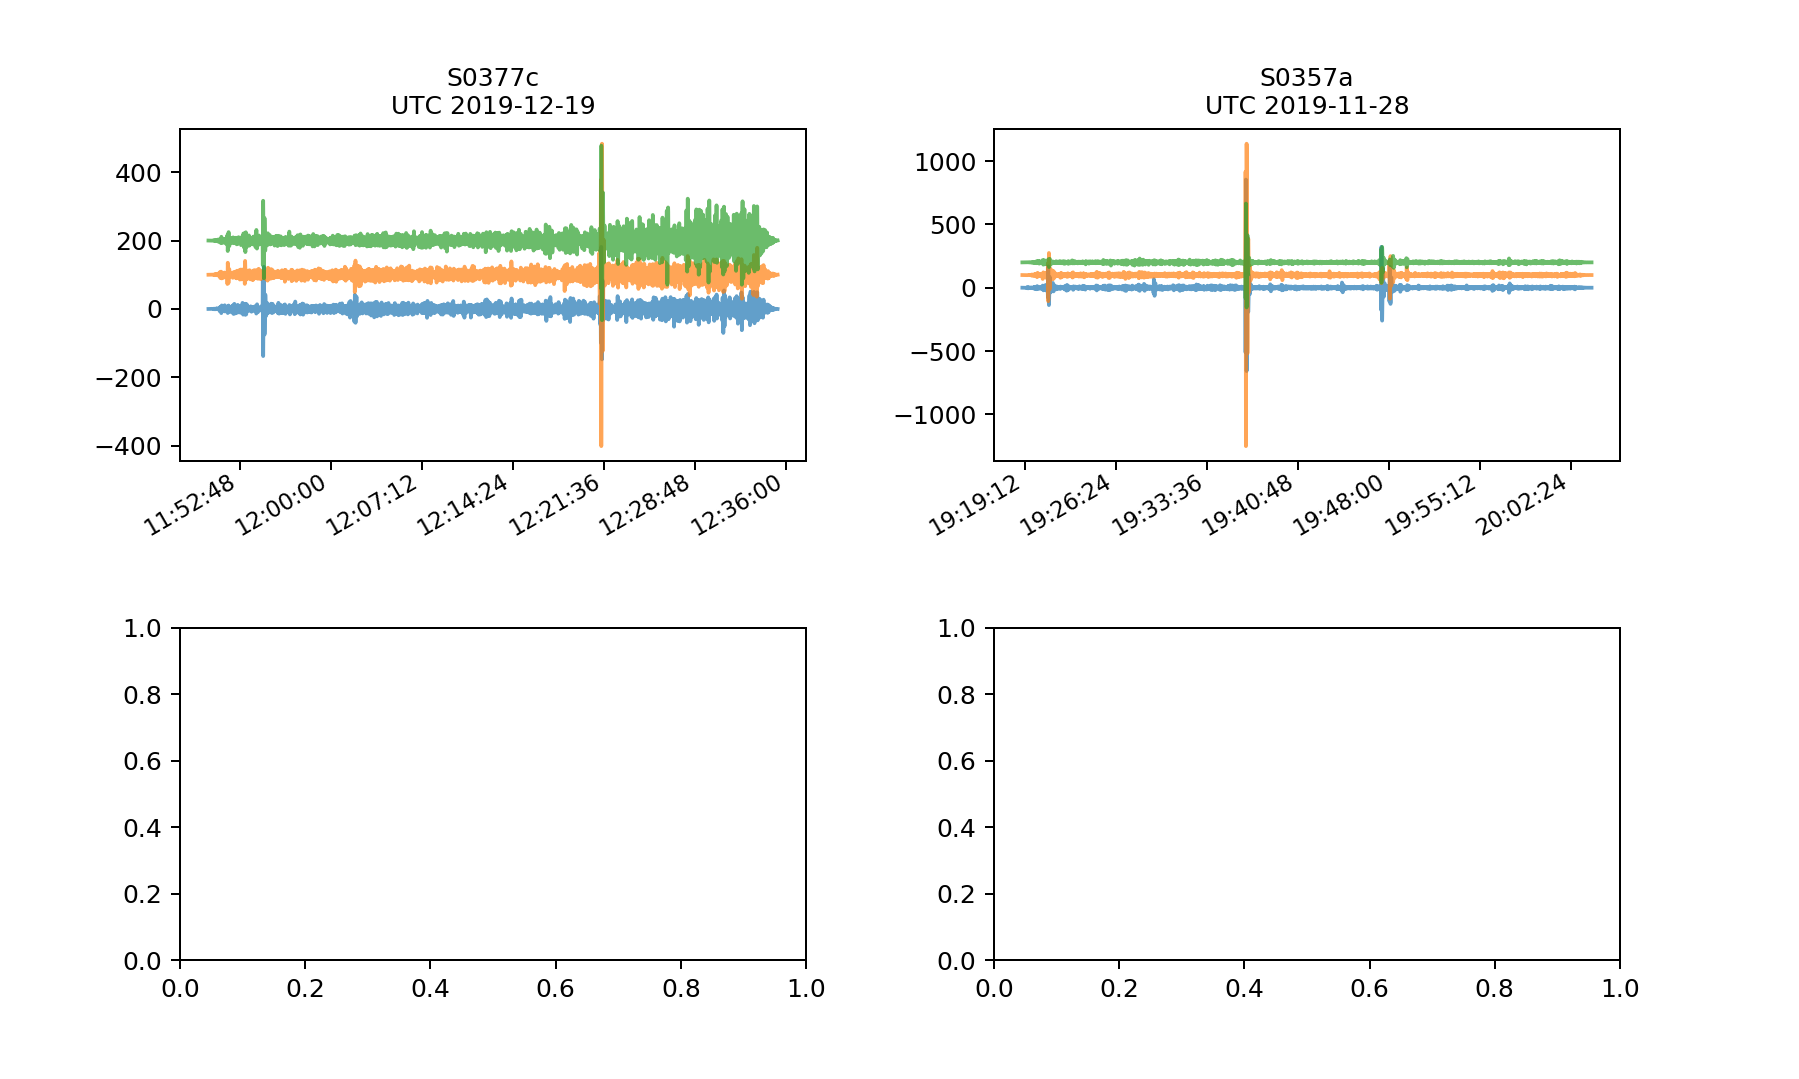

In [272]:
t_377c = "2019-12-19T11:50:20"
st_377c = waveforms(t_377c, 2700)
f_377c = waveform_filter(st_377c, 'lf')

fig,ax = plt.subplots(2,2, figsize=(10,6))
plt.subplots_adjust(left=0.1, wspace=0.3, hspace=0.5)

waveform_plotter(t_377c, f_377c, '377c',  ax[0][0], channels= [0,1,2])

t_357a = "2019-11-28-T19:19:00"
st_357a = waveforms(t_357a, 2700)
f_357a = waveform_filter(st_357a, 'lf')

waveform_plotter(t_357a, f_357a, '357a', ax[0][1], channels=[0,1,2])

## show plot
plt.show()